In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS').getOrCreate()

In [2]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [3]:
Total_Clean_data = spark.read.csv('Total_Clean_data.csv', inferSchema=True, header=True)
Total_Clean_data.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)
 |-- Bin_Global_Sales: double (nullable = true)



In [4]:
Total_Clean_data = Total_Clean_data.toPandas()

In [5]:
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Action",1)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Adventure",2)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Fighting",3)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Misc",4)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Platform",5)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Puzzle",6)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Racing",7)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Role-Playing",8)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Shooter",9)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Simulation",10)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Sports",11)
Total_Clean_data["Genre"] = Total_Clean_data["Genre"].replace("Strategy",12)

In [6]:
Total_Clean_data = spark.createDataFrame(Total_Clean_data)

In [9]:
vec_JP = VectorAssembler(inputCols=["Year","Genre",'JP_Sales','Rank',"Global_Sales"], outputCol='features')

In [10]:
JP_Output = vec_JP.transform(Total_Clean_data)
JP_Output.printSchema()

root
 |-- Rank: long (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Genre: long (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)
 |-- Bin_Global_Sales: double (nullable = true)
 |-- features: vector (nullable = true)



In [11]:
JP_df = JP_Output.select("features","Global_Sales")
JP_df.show()

+--------------------+------------+
|            features|Global_Sales|
+--------------------+------------+
|[2006.0,11.0,3.77...|       82.74|
|[1985.0,5.0,6.81,...|       40.24|
|[2008.0,7.0,3.79,...|       35.82|
|[2009.0,11.0,3.28...|        33.0|
|[1996.0,8.0,10.22...|       31.37|
|[1989.0,6.0,4.22,...|       30.26|
|[2006.0,5.0,6.5,7...|       30.01|
|[2006.0,4.0,2.93,...|       29.02|
|[2009.0,5.0,4.7,9...|       28.62|
|[1984.0,9.0,0.28,...|       28.31|
|[2005.0,10.0,1.93...|       24.76|
|[2005.0,7.0,4.13,...|       23.42|
|[1999.0,8.0,7.2,1...|        23.1|
|[2007.0,11.0,3.6,...|       22.72|
|[2009.0,11.0,2.53...|        22.0|
|[2010.0,4.0,0.24,...|       21.82|
|[2013.0,1.0,0.97,...|        21.4|
|[2004.0,1.0,0.41,...|       20.81|
|[1990.0,5.0,3.54,...|       20.61|
|[2005.0,4.0,4.16,...|       20.22|
+--------------------+------------+
only showing top 20 rows



In [13]:
train_JP,test_JP = JP_df.randomSplit([0.7, 0.3])

In [10]:
from pyspark.ml.regression import LinearRegression

In [15]:
lr_JP = LinearRegression(labelCol='Global_Sales')
lr_model_JP = lr_JP.fit(train_JP)

In [16]:
test_JP_Result = lr_model_JP.evaluate(test_JP)

In [17]:
test_JP_Result.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|-2.22044604925031...|
|-1.77635683940025...|
|-6.66133814775093...|
|-3.33066907387546...|
|-2.22044604925031...|
|-1.66533453693773...|
|-1.38777878078144...|
|-1.66533453693773...|
|-1.77635683940025...|
|-4.44089209850062...|
|-4.44089209850062...|
|-1.38777878078144...|
|-2.22044604925031...|
|-2.22044604925031...|
|-1.11022302462515...|
|-1.11022302462515...|
|-1.11022302462515...|
|-1.11022302462515...|
|-1.66533453693773...|
|-1.66533453693773...|
+--------------------+
only showing top 20 rows



In [18]:
predictions_lr = lr_model_JP.transform(test_JP)
predictions_lr.show()

+--------------------+------------+-------------------+
|            features|Global_Sales|         prediction|
+--------------------+------------+-------------------+
|[1980.0,4.0,0.0,1...|        1.05| 1.0500000000000003|
|[1980.0,9.0,0.0,2...|        4.31|  4.310000000000001|
|[1981.0,1.0,0.0,8...|        1.97| 1.9700000000000006|
|[1981.0,1.0,0.0,2...|        0.93| 0.9300000000000004|
|[1981.0,1.0,0.0,4...|         0.5| 0.5000000000000002|
|[1981.0,1.0,0.0,4...|        0.45| 0.4500000000000002|
|[1981.0,1.0,0.0,6...|        0.24|0.24000000000000013|
|[1981.0,1.0,0.0,7...|        0.22|0.22000000000000017|
|[1981.0,5.0,0.0,2...|         4.5|  4.500000000000002|
|[1981.0,6.0,0.0,1...|        1.65| 1.6500000000000004|
|[1981.0,9.0,0.0,1...|         1.6| 1.6000000000000005|
|[1981.0,11.0,0.0,...|        0.21|0.21000000000000013|
|[1982.0,1.0,0.0,3...|        0.66| 0.6600000000000003|
|[1982.0,1.0,0.0,3...|        0.63| 0.6300000000000002|
|[1982.0,1.0,0.0,3...|        0.62| 0.6200000000

In [8]:
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [19]:
test_JP_Result.meanSquaredError

3.5716460670213287e-31

In [9]:
import pandas as pd
import numpy as np
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
from pyspark.ml.pipeline import PipelineModel
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext,HiveContext,SparkSession,Row
from pandas.core.frame import DataFrame

In [22]:
precision = MulticlassClassificationEvaluator(labelCol="Global_Sales",\
                                              predictionCol="prediction",\
                                              metricName="weightedPrecision").evaluate(predictions_lr)

In [23]:
precision

0.7133603238866396

In [54]:
#######################EU.............................

In [42]:
vec_EU = VectorAssembler(inputCols=["Year","Genre",'EU_Sales','Rank',"Global_Sales"], outputCol='features')

In [43]:
output_EU = vec_EU.transform(Total_Clean_data)

In [44]:
final_df_EU = output_EU.select("features","Global_Sales")

In [45]:
train_EU,test_EU = final_df_EU.randomSplit([0.7, 0.3])

In [46]:
lr_EU = LinearRegression(labelCol='Global_Sales')
lr_model_EU = lr_EU.fit(train_EU)

In [47]:
test_EU_Result = lr_model_EU.evaluate(test_EU)

In [51]:
test_EU_Result.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|-3.05311331771918...|
|-2.22044604925031...|
|-2.77555756156289...|
|-2.77555756156289...|
|-3.33066907387546...|
|-3.33066907387546...|
|-2.77555756156289...|
|-2.77555756156289...|
|-2.77555756156289...|
|-3.05311331771918...|
|-3.05311331771918...|
|-2.22044604925031...|
|-2.22044604925031...|
|-2.22044604925031...|
|4.440892098500626...|
|-1.11022302462515...|
|8.881784197001252...|
|-2.22044604925031...|
|-2.22044604925031...|
|-2.22044604925031...|
+--------------------+
only showing top 20 rows



In [48]:
predictions_lr_EU = lr_model_EU.transform(test_EU)
predictions_lr_EU.show()

+--------------------+------------+-------------------+
|            features|Global_Sales|         prediction|
+--------------------+------------+-------------------+
|[1980.0,4.0,0.0,6...|        0.24| 0.2400000000000003|
|[1980.0,4.0,0.01,...|        1.05| 1.0500000000000003|
|[1981.0,1.0,0.0,4...|        0.45| 0.4500000000000003|
|[1981.0,1.0,0.0,4...|        0.43|0.43000000000000027|
|[1981.0,1.0,0.0,4...|         0.4|0.40000000000000036|
|[1981.0,1.0,0.0,4...|        0.39|0.39000000000000035|
|[1981.0,1.0,0.0,5...|        0.36|0.36000000000000026|
|[1981.0,1.0,0.0,5...|        0.31| 0.3100000000000003|
|[1981.0,1.0,0.0,6...|        0.29|0.29000000000000026|
|[1981.0,1.0,0.0,7...|        0.22| 0.2200000000000003|
|[1981.0,1.0,0.0,8...|        0.17|0.17000000000000032|
|[1981.0,1.0,0.01,...|        0.82| 0.8200000000000002|
|[1981.0,1.0,0.01,...|        0.79| 0.7900000000000003|
|[1981.0,1.0,0.01,...|        0.59| 0.5900000000000002|
|[1981.0,1.0,0.02,...|         2.2| 2.1999999999

In [49]:
precision_EU = MulticlassClassificationEvaluator(labelCol="Global_Sales",\
                                              predictionCol="prediction",\
                                              metricName="weightedPrecision").evaluate(predictions_lr_EU)

In [50]:
precision_EU

0.7651780201687592

In [94]:
########################NA....................................

In [39]:
vec_NA = VectorAssembler(inputCols=["Year","Genre",'NA_Sales','Rank',"Global_Sales"], outputCol='features')
output_NA = vec_NA.transform(Total_Clean_data)
final_df_NA = output_NA.select("features","Global_Sales")
train_NA,test_NA = final_df_NA.randomSplit([0.7, 0.3])
lr_NA = LinearRegression(labelCol='Global_Sales')
lr_model_NA = lr_NA.fit(train_NA)

+--------------------+------------+-------------------+
|            features|Global_Sales|         prediction|
+--------------------+------------+-------------------+
|[1980.0,4.0,0.07,...|        1.15| 1.1499999999999997|
|[1980.0,9.0,0.17,...|        2.76|  2.759999999999999|
|[1980.0,11.0,0.03...|        0.49|               0.49|
|[1981.0,1.0,0.01,...|        0.24|0.24000000000000005|
|[1981.0,1.0,0.01,...|        0.22|0.22000000000000006|
|[1981.0,1.0,0.02,...|        0.39|0.39000000000000007|
|[1981.0,1.0,0.02,...|        0.37|0.37000000000000005|
|[1981.0,1.0,0.02,...|        0.36|0.36000000000000004|
|[1981.0,1.0,0.02,...|        0.29|0.29000000000000004|
|[1981.0,1.0,0.03,...|        0.67|               0.67|
|[1981.0,1.0,0.03,...|        0.59|               0.59|
|[1981.0,1.0,0.03,...|         0.5|                0.5|
|[1981.0,1.0,0.04,...|        0.79|               0.79|
|[1981.0,1.0,0.04,...|        0.69|               0.69|
|[1981.0,1.0,0.05,...|        0.82|             

In [55]:
test_NA_Result = lr_model_NA.evaluate(test_NA)
test_NA_Result.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|-5.55111512312578...|
|2.220446049250313...|
|                 0.0|
|                 0.0|
|-5.55111512312578...|
|-5.55111512312578...|
|-5.55111512312578...|
|                 0.0|
|                 0.0|
|-2.77555756156289...|
|-5.55111512312578...|
|                 0.0|
|                 0.0|
|                 0.0|
|8.881784197001252...|
|1.110223024625156...|
|8.881784197001252...|
|2.220446049250313...|
|                 0.0|
|2.220446049250313...|
+--------------------+
only showing top 20 rows



In [52]:
predictions_lr_NA = lr_model_NA.transform(test_NA)
predictions_lr_NA.show()

+--------------------+------------+-------------------+
|            features|Global_Sales|         prediction|
+--------------------+------------+-------------------+
|[1980.0,4.0,0.07,...|        1.15| 1.1499999999999997|
|[1980.0,9.0,0.17,...|        2.76|  2.759999999999999|
|[1980.0,11.0,0.03...|        0.49|               0.49|
|[1981.0,1.0,0.01,...|        0.24|0.24000000000000005|
|[1981.0,1.0,0.01,...|        0.22|0.22000000000000006|
|[1981.0,1.0,0.02,...|        0.39|0.39000000000000007|
|[1981.0,1.0,0.02,...|        0.37|0.37000000000000005|
|[1981.0,1.0,0.02,...|        0.36|0.36000000000000004|
|[1981.0,1.0,0.02,...|        0.29|0.29000000000000004|
|[1981.0,1.0,0.03,...|        0.67|               0.67|
|[1981.0,1.0,0.03,...|        0.59|               0.59|
|[1981.0,1.0,0.03,...|         0.5|                0.5|
|[1981.0,1.0,0.04,...|        0.79|               0.79|
|[1981.0,1.0,0.04,...|        0.69|               0.69|
|[1981.0,1.0,0.05,...|        0.82|             

In [40]:
precision_NA = MulticlassClassificationEvaluator(labelCol="Global_Sales",\
                                              predictionCol="prediction",\
                                              metricName="weightedPrecision").evaluate(predictions_lr_NA)

In [11]:
vec_NA = VectorAssembler(inputCols=["Year","Genre",'NA_Sales','Rank',"Global_Sales"], outputCol='features')
output_NA = vec_NA.transform(Total_Clean_data)
final_df_NA = output_NA.select("features","Global_Sales")
train_NA,test_NA = final_df_NA.randomSplit([0.7, 0.3])
lr_NA = LinearRegression(labelCol='Global_Sales')
lr_model_NA = lr_NA.fit(train_NA)

In [12]:
test_NA_Result = lr_model_NA.evaluate(test_NA)
test_NA_Result.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|-5.55111512312578...|
|                 0.0|
|-5.55111512312578...|
|-5.55111512312578...|
|-5.55111512312578...|
|-2.22044604925031...|
|2.775557561562891...|
|                 0.0|
|2.775557561562891...|
|                 0.0|
|-5.55111512312578...|
|                 0.0|
|                 0.0|
|-1.11022302462515...|
|-1.11022302462515...|
|-2.22044604925031...|
|-2.22044604925031...|
|                 0.0|
|-2.22044604925031...|
|4.440892098500626...|
+--------------------+
only showing top 20 rows



In [33]:
predictions_lr_NA = lr_model_NA.transform(test_NA)
predictions_lr_NA.show()

+--------------------+------------+-------------------+
|            features|Global_Sales|         prediction|
+--------------------+------------+-------------------+
|[1980.0,1.0,0.32,...|        0.34| 0.3400000000000001|
|[1980.0,4.0,0.25,...|        0.27|               0.27|
|[1981.0,1.0,0.3,5...|        0.33|0.33000000000000007|
|[1981.0,1.0,0.32,...|        0.34| 0.3400000000000001|
|[1981.0,1.0,0.35,...|        0.37|0.37000000000000005|
|[1981.0,9.0,1.49,...|         1.6| 1.6000000000000003|
|[1981.0,11.0,0.12...|        0.13|0.12999999999999998|
|[1981.0,11.0,0.18...|        0.19|               0.19|
|[1982.0,1.0,0.13,...|        0.14|0.13999999999999999|
|[1982.0,1.0,0.14,...|        0.15|               0.15|
|[1982.0,1.0,0.29,...|        0.31|0.31000000000000005|
|[1982.0,1.0,0.35,...|        0.38|               0.38|
|[1982.0,1.0,0.46,...|         0.5|                0.5|
|[1982.0,1.0,0.58,...|        0.63| 0.6300000000000001|
|[1982.0,5.0,0.67,...|        0.72| 0.7200000000

In [31]:
import matplotlib.pylab as plt

<function matplotlib.pyplot.show(*args, **kw)>

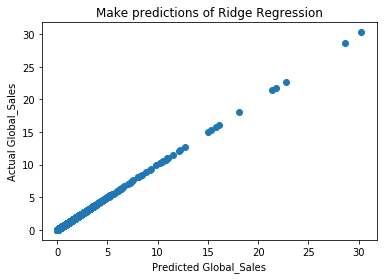

In [35]:
plt.scatter(x = predictions_lr_NA.toPandas()["prediction"], y =  predictions_lr_NA.toPandas()["Global_Sales"])
plt.title("Make predictions of Ridge Regression")
plt.xlabel("Predicted Global_Sales")
plt.ylabel("Actual Global_Sales")
plt.show